<a href="https://colab.research.google.com/github/FredLongo/MLDL_Project/blob/main/LSTM_CodeTrading_Vid_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Review with Video https://www.youtube.com/watch?v=hpfQE0bTeA4

In [1]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=43fc4817b96081eee7b4a9a9087c8ac4df51ac33744fe37b7fcd70582bdd6f17
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,759.429993,760.619995,756.840027,759.130005,759.130005,0
2012-03-13,761.450012,773.030029,761.450012,772.979980,772.979980,0
2012-03-14,773.190002,774.679993,769.280029,771.630005,771.630005,0
2012-03-15,772.380005,776.469971,770.739990,776.419983,776.419983,0
2012-03-16,776.559998,778.099976,775.640015,777.130005,777.130005,0
2012-03-19,777.119995,782.549988,776.070007,780.090027,780.090027,0
2012-03-20,778.030029,778.299988,773.119995,777.369995,777.369995,0
2012-03-21,777.559998,778.650024,774.760010,776.150024,776.150024,0
2012-03-22,773.640015,773.640015,768.000000,770.270020,770.270020,0


In [3]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)   # Fast Moving Average
data['EMAM']=ta.ema(data.Close, length=100)  # Mediom Moving Average
data['EMAS']=ta.ema(data.Close, length=150)  # Slow Moving Average


# 3 ways of Adding Target data into dataframe
data['Target'] = data['Adj Close']-data.Open                                    # 1) Diff of current open and future close
data['Target'] = data['Target'].shift(-1)                                       #
data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]  # 2) Classificaton approche 1= up 0 = down.
data['TargetNextClose'] = data['Adj Close'].shift(-1)                           # 3) Closing Price of the next day

# We are trying to predict "TargetNextClose"

data.dropna(inplace=True)                                                       # Dropping values not their
data.reset_index(inplace = True)                                                # rebuild index after removed values
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)                    # Removing unsued Columns


In [8]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,791.440002,795.679993,789.760010,789.760010,46.877256,795.406526,775.179523,762.677734,-2.690002,0,787.179993
1,789.869995,792.669983,785.640015,787.179993,44.575540,794.623046,775.417156,763.002267,6.260010,1,793.440002
2,787.179993,794.020020,786.260010,793.440002,50.849388,794.510376,775.774044,763.405416,7.019958,1,801.599976
3,794.580017,801.859985,794.580017,801.599976,57.558969,795.185576,776.285448,763.911304,4.369995,1,805.039978
4,800.669983,805.770020,800.669983,805.039978,60.023875,796.124090,776.854845,764.456055,-0.809998,0,803.330017
5,804.140015,806.770020,800.780029,803.330017,58.222935,796.810369,777.379106,764.970942,-12.209961,0,790.340027
6,802.549988,802.549988,788.549988,790.340027,46.795154,796.194146,777.635758,765.306956,0.830017,1,790.429993
7,789.599976,791.450012,784.169983,790.429993,46.872532,795.645179,777.889109,765.639712,-8.400024,0,779.619995
8,788.020020,788.020020,775.929993,779.619995,39.480532,794.118971,777.923384,765.824881,-4.059998,0,777.270020
9,781.330017,783.530029,776.349976,777.270020,38.081714,792.514309,777.910446,765.976472,-0.340027,0,779.429993


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))             # Apply Scaler to oour data to make it between 0 and `
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.02295817 0.02294337 0.02477161 ... 0.61254467 0.         0.02075971]
 [0.02213767 0.02137597 0.02261574 ... 0.64462357 1.         0.02403152]
 [0.02073185 0.02207898 0.02294016 ... 0.6473474  1.         0.02829634]
 ...
 [0.70292872 0.70530315 0.68624737 ... 0.63741923 1.         0.71234811]
 [0.71004135 0.71485848 0.70603747 ... 0.72379951 1.         0.73006085]
 [0.7151577  0.72731964 0.71872676 ... 0.62397837 1.         0.72869667]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
framedays = 10                                                                # Backcandles number of days in frame

print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X         # Removing some of the columns
    X.append([])
    for i in range(framedays, data_set_scaled.shape[0]):#backcandles+2
        print(f"j:{j}   i:{i}")
        X[j].append(data_set_scaled[i-framedays:i, j])


In [29]:
print(X[0][0])
print(X[1][0])
print(X[2][0])

[0.02295817 0.02213767 0.02073185 0.02459916 0.02778183 0.0295953
 0.02876433 0.02199655 0.02117086 0.01767461]
[0.02294337 0.02137597 0.02207898 0.02616148 0.02819756 0.02871829
 0.02652079 0.0207407  0.01895459 0.01661652]
[0.02477161 0.02261574 0.02294016 0.02729377 0.03048047 0.03053805
 0.02413844 0.02184651 0.01753478 0.01775454]


In [30]:

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])


In [31]:
print(X[0][0])
print(X[1][0])
print(X[2][0])

[2.29581669e-02 2.29433745e-02 2.47716068e-02 2.21081615e-02
 4.32102883e-01 1.38101972e-02 8.97234280e-05 0.00000000e+00]
[2.21376684e-02 2.13759713e-02 2.26157378e-02 2.07597112e-02
 3.97712801e-01 1.33872827e-02 2.23202774e-04 1.85785313e-04]
[2.07318516e-02 2.20789762e-02 2.29401625e-02 2.40315161e-02
 4.91450787e-01 1.33264641e-02 4.23668073e-04 4.16575636e-04]


In [34]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
framedays = 10                                                                # framedays number of days in frame

print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X         # Removing some of the columns
    X.append([])
    for i in range(framedays, data_set_scaled.shape[0]):#framedays+2
        X[j].append(data_set_scaled[i-framedays:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of framedays to match X length
#del(yi[0:framedays])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[framedays:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
print(X.shape)
print(y)
print(y.shape)

2448
(2438, 10, 8)
[[0.01631194]
 [0.01666734]
 [0.02155415]
 ...
 [0.71234811]
 [0.73006085]
 [0.72869667]]
(2438, 1)


In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [33]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1950
(1950, 10, 8)
(488, 10, 8)
(1950, 1)
(488, 1)
[[0.01631194]
 [0.01666734]
 [0.02155415]
 ...
 [0.54296193]
 [0.55545855]
 [0.55227039]]


#Now build the model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)


# input
lstm_input = Input(shape=(framedays, 8), name='lstm_input')                     # Input layer
inputs = LSTM(150, name='first_layer')(lstm_input)                              # Long Short Term memory  wiht 150 layers
inputs = Dense(1, name='dense_layer')(inputs)                                   # One Dense Layer
output = Activation('linear', name='output')(inputs)                            # Output layer
model = Model(inputs=lstm_input, outputs=output)                                # declare model
adam = optimizers.Adam()                                                        # instanciate optimizer
model.compile(optimizer=adam, loss='mse')                                       # Compile model


Using TensorFlow backend.
D:\ProgramFiles\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramFiles\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramFiles\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramFiles\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1739 samples, validate on 194 samples
Epoch 1/30
1739/1739 [==============================] - 4s 2ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 2/30
1739/1739 [==============================] - 3s 2ms/step - loss: 1.0109e-04 - val_loss: 0.0013
Epoch 3/30
1739/1739 [==============================] - 3s 2ms/step - loss: 9.2762e-05 - val_loss: 0.0012
Epoch 4/30
1739/1739 [==============================] - 3s 2ms/step - loss: 9.0082e-05 - val_loss: 0.0012
Epoch 5/30
1739/1739 [==============================] - 3s 1ms/step - loss: 8.0987e-05 - val_loss: 0.0011
Epoch 6/30
1739/1739 [==============================] - 3s 1ms/step - loss: 8.2002e-05 - val_loss: 0.0011
Epoch 7/30
1739/1739 [==============================] - 3s 1ms/step - loss: 9.0233e-05 - val_loss: 0.0010
Epoch 8/30
1739/1739 [==============================] - 3s 1ms/step - loss: 7.8398e-05 - val_loss: 0.0010
Epoch 9/3

In [35]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)


# input
lstm_input = Input(shape=(framedays, 8), name='lstm_input')                     # Input layer
inputs = LSTM(150, name='first_layer')(lstm_input)                              # Long Short Term memory  wiht 150 layers
inputs = Dense(1, name='dense_layer')(inputs)                                   # One Dense Layer
output = Activation('linear', name='output')(inputs)                            # Output layer
model = Model(inputs=lstm_input, outputs=output)                                # declare model
adam = optimizers.Adam()                                                        # instanciate optimizer
model.compile(optimizer=adam, loss='mse')                                       # Compile model

In [36]:
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 [==============================] - 4s 17ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 2/30
117/117 [==============================] - 2s 13ms/step - loss: 1.1189e-04 - val_loss: 0.0014
Epoch 3/30
117/117 [==============================] - 2s 20ms/step - loss: 1.0910e-04 - val_loss: 0.0013
Epoch 4/30
117/117 [==============================] - 1s 12ms/step - loss: 9.7999e-05 - val_loss: 0.0012
Epoch 5/30
117/117 [==============================] - 1s 12ms/step - loss: 9.5354e-05 - val_loss: 0.0011
Epoch 6/30
117/117 [==============================] - 1s 12ms/step - loss: 9.7825e-05 - val_loss: 0.0011
Epoch 7/30
117/117 [==============================] - 1s 11ms/step - loss: 8.2952e-05 - val_loss: 0.0013
Epoch 8/30
117/117 [==============================] - 1s 12ms/step - loss: 8.4743e-05 - val_loss: 0.0010
Epoch 9/30
117/117 [==============================] - 1s 12ms/step - loss: 8.2683e-05 - val_loss: 9.8519e-04
Epoch 10/30
117/117 [==============================] - 

In [37]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 1s 6ms/step
[0.54769117] [0.55846903]
[0.5472202] [0.56623563]
[0.55084497] [0.569612]
[0.5578937] [0.57616078]
[0.56219125] [0.58137683]
[0.5677648] [0.58120438]
[0.57268] [0.58292916]
[0.57465094] [0.57508415]
[0.5769011] [0.58856329]
[0.5720881] [0.58750759]


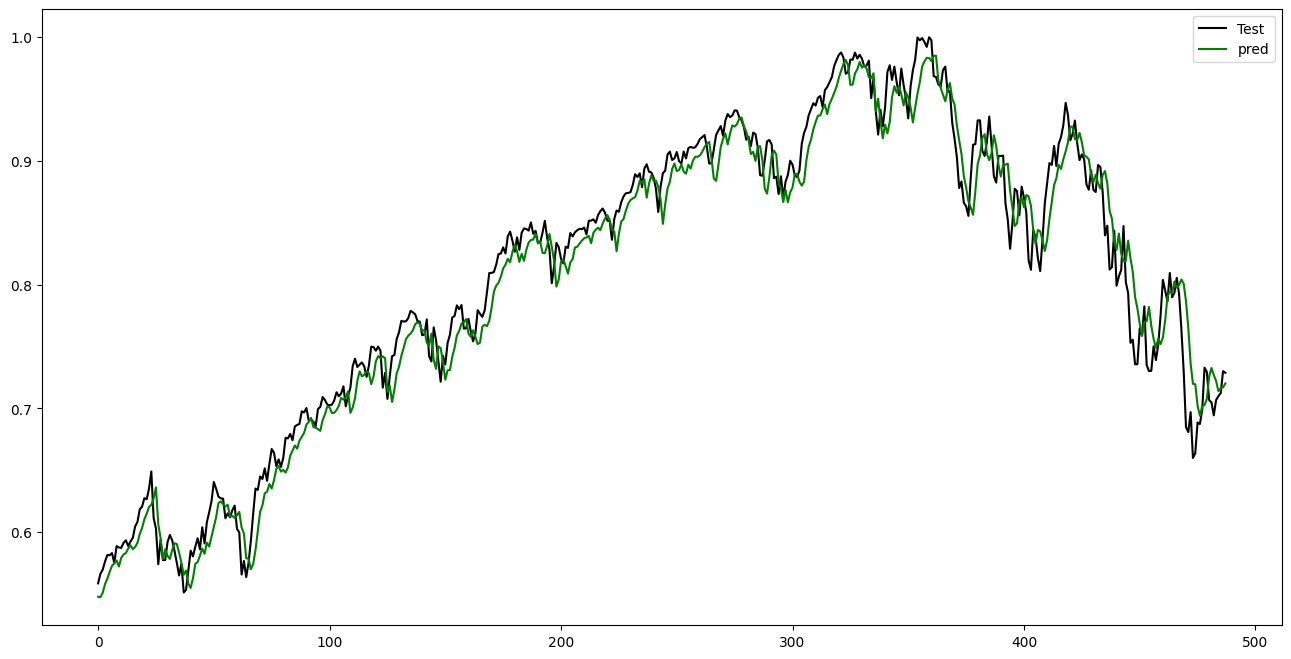

In [38]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()